## Regressor回归

#### 导入模块并创建数据
>models.Sequential，用来一层一层一层的去建立神经层； 

>layers.Dense 意思是这个神经层是全连接层。

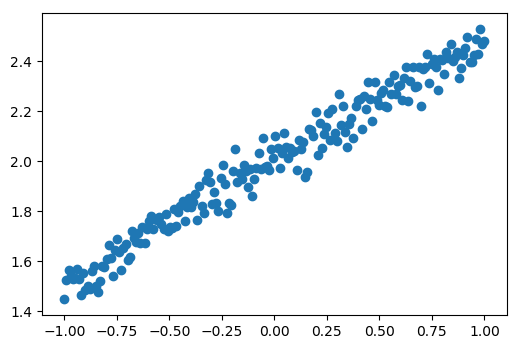

In [22]:
import numpy as np
np.random.seed(1337)  # for 让随机数保持一致
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块

# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 100
plt.show()

X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

#### 建立模型 
>然后用 Sequential 建立 model， 再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

>参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的。

>如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。在这个例子里，只需要一层就够了。

In [23]:
#先建立一个神经网络
#Sequential模型
model = Sequential()
#增加一个全连接层，定义输入输出层
model.add(Dense(output_dim=1,input_dim=1))
#若增加第二层，默认第二层的输入为第一层的输出，故无需定义inpu_dim
# model.add(Dense(output_dim=1))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  """


#### 激活模型 
>接下来要激活神经网络，上一步只是定义模型。

>参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法。

In [24]:
#选择损失函数和优化函数
#用二次方的误差，优化器选用sgd
model.compile(loss='mse',optimizer='sgd')

>以上三行就构建好了一个神经网络，它比 Tensorflow 要少了很多代码，很简单。
---
#### 训练模型 
>训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果。

In [25]:
#训练。。。
for step in range(301):
    cost = model.train_on_batch(X_train,Y_train)
    if step % 100 == 0:
        print('train cost:', cost)

train cost: 4.0225005
train cost: 0.073238626
train cost: 0.00386274
train cost: 0.002643449


#### 检验模型 
>用到的函数是 model.evaluate，输入测试集的x和y， 输出 cost，weights 和 biases。其中 weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 2。

In [26]:
#测试。。。
print('\n Testting------------')
#评价下
cost = model.evaluate(X_test,Y_test,batch_size=40)
print('test_cost:',cost)
W,b = model.layers[0].get_weights()
print('Weights=', W, '\nbaises=',b)


 Testting------------
40/40 [==============================] - 0s 2ms/step
test_cost: 0.0031367032788693905
Weights= [[0.4922711]] 
baises= [1.9995022]


#### 可视化结果 
>最后可以画出预测结果，与测试集的值进行对比。

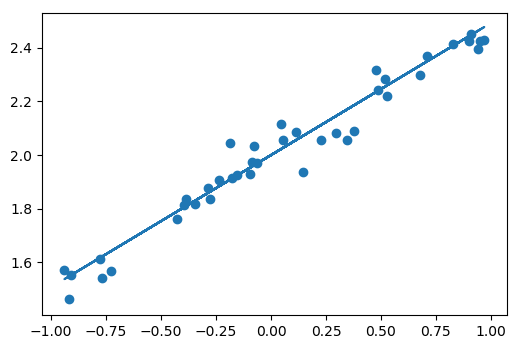

In [30]:
#展示预测结果
Y_pred = model.predict(X_test)
plt.scatter(X_test,Y_test)
plt.plot(X_test, Y_pred)
plt.show()

---

## Classifier分类

>今天用 Keras 来构建一个分类神经网络，用到的数据集是 MNIST，就是 0 到 9 这几个数字的图片数据集。

#### 数据预处理 
>Keras 自身就有 MNIST 这个数据包，再分成训练集和测试集。x 是一张张图片，y 是每张图片对应的标签，即它是哪个数字。

>输入的 x 变成 60,000*784 的数据，然后除以 255 进行标准化，因为每个像素都是在 0 到 255 之间的，标准化之后就变成了 0 到 1 之间。

>对于 y，要用到 Keras 改造的 numpy 的一个函数 np_utils.to_categorical，把 y 变成了 one-hot 的形式，即之前 y 是一个数值， 在 0-9 之间，现在是一个大小为 10 的向量，它属于哪个数字，就在哪个位置为 1，其他位置都是 0

#### 建立神经网络 

*相关的包*

models.Sequential，用来一层一层一层的去建立神经层；

layers.Dense 意思是这个神经层是全连接层。

layers.Activation 激励函数。

optimizers.RMSprop 优化器采用 RMSprop，加速神经网络训练方法。

In [38]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

# download the mnist to the path '~/.keras/datasets/' if it is the first time to be called
# X shape (60,000 28x28), y shape (10,000, )
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing
X_train = X_train.reshape(X_train.shape[0], -1) / 255.   # normalize
X_test = X_test.reshape(X_test.shape[0], -1) / 255.      # normalize
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print(X_train[1].shape)
"""
(784,)
"""

print(y_train[:3])
"""
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]
"""

(784,)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


'\n[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]\n [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]\n [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]\n'

#### 建立模型

>在回归网络中用到的是 model.add 一层一层添加神经层，今天的方法是直接在模型的里面加多个神经层。好比一个水管，一段一段的，数据是从上面一段掉到下面一段，再掉到下面一段。

>第一段就是加入 Dense 神经层。32 是输出的维度，784 是输入的维度。 第一层传出的数据有 32 个 feature，传给激励单元，激励函数用到的是 relu 函数。 经过激励函数之后，就变成了非线性的数据。 然后再把这个数据传给下一个神经层，这个 Dense 我们定义它有 10 个输出的 feature。同样的，此处不需要再定义输入的维度，因为它接收的是上一层的输出。 接下来再输入给下面的 softmax 函数，用来分类。

In [50]:
#build
model = Sequential([
    Dense(32, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])


>接下来用 RMSprop 作为优化器，它的参数包括学习率等，可以通过修改这些参数来看一下模型的效果。

In [51]:
#optimizer
rmsprop = RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.0)

#### 激活模型

>接下来用 model.compile 激励神经网络。

>优化器，可以是默认的，也可以是我们在上一步定义的。 损失函数，分类和回归问题的不一样，用的是交叉熵。 metrics，里面可以放入需要计算的 cost，accuracy，score 等。

In [52]:
model.compile(
    optimizer=rmsprop,
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

#### 训练网络 
>这里用到的是 fit 函数，把训练集的 x 和 y 传入之后，nb_epoch 表示把整个数据训练多少次，batch_size 每批处理32个

In [53]:
print('Training--------------')
model.fit(X_train,y_train,nb_epoch=2,batch_size=32)

Training--------------


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/2
60000/60000 [==============================] - 11s 188us/step - loss: 0.2943 - acc: 0.9151
Epoch 2/2
60000/60000 [==============================] - 10s 166us/step - loss: 0.1659 - acc: 0.9529


#### 测试模型 
>接下来就是用测试集来检验一下模型，方法和回归网络中是一样的，运行代码之后，可以输出 accuracy 和 loss。

In [54]:
print('\nTestting')
loss, accuracy = model.evaluate(X_test,y_test)
print('test lost:',loss)
print('test accuracy:',accuracy)


Testting
10000/10000 [==============================] - 1s 89us/step
test lost: 0.14480415468392893
test accuracy: 0.9575


---
## CNN卷积神经网络

#### 搭建模型 
>这次我们主要讲CNN（Convolutional Neural Networks）卷积神经网络在 keras 上的代码实现。 用到的数据集还是MNIST。不同的是这次用到的层比较多，导入的模块也相应增加了一些。

In [38]:
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, Flatten

import numpy as np
np.random.seed(1337) # for reproducibility

from keras.utils import np_utils
from keras.models import Sequential
from keras.optimizers import Adam
from keras.datasets import mnist



(X_train, y_train), (X_test, y_test) = mnist.load_data()

# data pre-processing

X_train = X_train.reshape(-1,1,28,28) # normalize
X_test = X_test.reshape(-1,1,28,28) # normalize


y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print('X_train shape: ',X_train.shape)
print('X_test shape: ',np.shape(X_test ))

model = Sequential()

X_train shape:  (60000, 1, 28, 28)
X_test shape:  (10000, 1, 28, 28)


>首先是数据预处理和model的设置。 然后添加第一个卷积层，滤波器数量为32，大小是5*5，Padding方法是same即不改变数据的长度和宽带。 因为是第一层所以需要说明输入数据的 shape ，激励选择 relu 函数。代码如下

In [39]:
#加第一层layer
# model.add(Convolution2D(
# batch_input_shape=(32, 1, 28, 28),
# filters=32,#滤波器
# kernel_size=5,
# strides=1,
# padding='same', # Padding method
# data_format='channels_last',
# ))
# model.add(Activation('relu'))
model.add(Convolution2D(
    nb_filter=32, #32个滤波器可以生成32张不同feature的图片
    nb_row=5,
    nb_col=5,
    border_mode='same',  #padding method
    input_shape=(1, 28, 28), #就是图片的个数和长宽
))
model.add(Activation('relu'))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(1, 28, 28..., kernel_size=(5, 5), filters=32, padding="same")`
  app.launch_new_instance()


>第一层 pooling（池化，下采样），分辨率长宽各降低一半，输出数据shape为（32，14，14）

In [40]:
# model.add(MaxPooling2D(
# pool_size=2,
# strides=2,
# padding='same', # Padding method
# data_format='channels_last',
# ))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2),  #跳过2个pixel取样
    border_mode='same',
))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same")`
  # Remove the CWD from sys.path while we load stuff.


>再添加第二卷积层和池化层

In [41]:
# model.add(Convolution2D(64,
# 5, 
# strides=1,
# padding='same',
# data_format='channels_last'
# ))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(2,
# 2,
# 'same', 
# data_format='channels_last'
# ))
model.add(Convolution2D(64, 5, 5, border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), padding="same")`
  del sys.path[0]
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`
  from ipykernel import kernelapp as app


>经过以上处理之后数据shape为（64，7，7），需要将数据抹平成一维，再添加全连接层1

In [42]:
# model.add(Flatten())
# model.add(Dense(256))
# model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

>添加全连接层2（即输出层）

In [43]:
model.add(Dense(10))
model.add(Activation('softmax'))#用于分类的method


>设置adam优化方法，loss函数, metrics方法来观察输出结果

In [44]:
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])


>训练模型

In [45]:
print('\nTraining ------------')
model.fit(X_train, y_train, epochs=2, batch_size=32,)


Training ------------
Epoch 1/2
60000/60000 [==============================] - 276s 5ms/step - loss: 0.4145 - acc: 0.9268
Epoch 2/2
60000/60000 [==============================] - 271s 5ms/step - loss: 0.1028 - acc: 0.9706


>查看训练结果

In [46]:
# Evaluate the model with the metrics we defined earlier

print('\nTesting ------------')

loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)


Testing ------------
10000/10000 [==============================] - 1s 147us/step
test loss:  0.07684242130387574
test accuracy:  0.9771
